# Вопрос 1
В отличии от одномерного пространства с 2 направлениями, двухмерное пространство имеет континуум направлений, таким образом прямой перебор с ограниченной точностью потребует большого количества вычислений. 

# Вопрос 2

Метод Нелдера-Мида является хорошим выбором для простых задач минимизации. Однако, поскольку он не использует оценки градиента, для поиска минимума может потребоваться больше времени.
Главное преимущество в методе Нелдера-Мида, на мой взягляд, является отсутствие ограничения на гладкость функции(т.е. существования производных в каждой точке функции). Ещё он даёт высокую хорошую оптимизацию на первых итерациях, хотя на это способны и рассмотренные методы.

Минусом является плохая сходимость в конце оптимизации, а то и вообще отсутствие сходимости.

Я читал, что его используют, когда не нужна хорошая точность результатов, например для оценки параметров в методе опорных векторов

# Вопрос 3
Методы, использующие производные, имеют повышенную точность вместе с пониженной производительностью по сравнению с симплекс методами.

# Задача 1
Для расчета глобального минимума воспользуемся методом Монте-Карло


Рассмотрим функцию \\(f(x) = cos(30x) + sin(10x) + 0.3x^2\\)  
Т.к.
$$ 
\begin{aligned}
\lim_{x \to +\infty} f(x) = \infty, 
\lim_{x \to -\infty} f(x) = \infty
\end{aligned}
$$
и возрастающим членом функции является 
$0.3x^2$ можно утверждать, 
что глобальный минимум находится в окрестности нуля, 
поэтому ограничиваем поиск глобального минимума этой окрестностью.

Global minimum, x: -0.11399999999999988, y: -2.2156703121475503


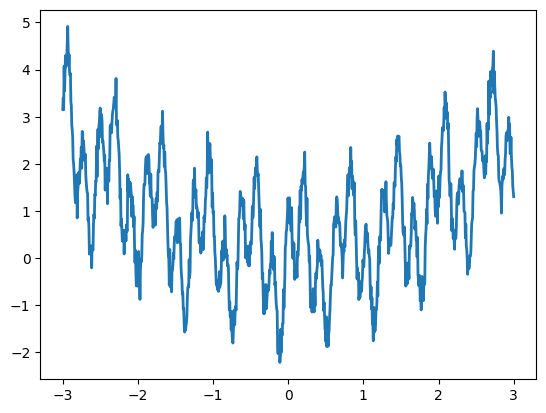

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

n = 1000
interval = 3
t = np.linspace(-interval, interval, n)
np.random.seed(2)
dt = (2*interval)/n
x = np.cos(30 * t) + np.sin(10 * t) + 0.3 * (t ** 2)

def noisy_signal(signal):
    return np.random.normal(0, 0.2, len(signal)) + signal

# Monte-Carlo Method
points = random.sample(range(n), n)
function = noisy_signal(x)

gf_min = function[0]
gx_min = 0
for x in points[2:]:
    if function[x] < gf_min:
        gf_min = function[x]
        gx_min = x
        
print(f'Global minimum, x: {gx_min*dt-interval}, y: {gf_min}')

fig, axis = plt.subplots()
axis.plot(t, function, linewidth=2.0)
plt.show()

# Задача 2
Сравним методы Nelder-Mead, Newton-CG для функции Beale: \\(f(x,y) = (1.5-x+xy)^2 + (2.25 - x +xy^2)^2 + (2.625 - x +xy^3)^2\\) \
где \\(f(0)=(3, 0.5)\\)



In [5]:
import numpy as np
from scipy.optimize import minimize


def beale(x):
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*pow(x[1], 3))**2

def jacobian(x0):
    der = np.zeros(2)
    der[0] = 2*(1.5-x0[0]+x0[0]*x0[1])*(x0[1]-1)+2*(2.25-x0[0]+x0[0]*x0[1]**2)*(x0[1]**2-1) +2*(2.625-x0[0]+x0[0]*pow(x0[1], 3))*(pow(x0[1], 3)-1)
    der[1] = 2*(1.5-x0[0]+x0[0]*x0[1])*x0[0] +   2*(2.25-x0[0]+x0[0]*x0[1]**2)*2*x0[0]*x0[1]+2*(2.625-x0[0]+x0[0]*pow(x0[1], 3))*3*x0[0]*x0[1]**2
    return der

x0 = [3.5, 1]
nelder_mead = minimize(beale, x0,  method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
newton = minimize(beale, x0,  method='Newton-CG', jac=jacobian, options={'disp': True})

print(nelder_mead.x)
print(newton.x)

x0 = [1, -4]
nelder_mead = minimize(beale, x0,  method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
newton = minimize(beale, x0,  method='Newton-CG', jac=jacobian, options={'disp': True})

print(nelder_mead.x)
print(newton.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 80
         Function evaluations: 150
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 59
         Hessian evaluations: 0
[3.  0.5]
[3.00000002 0.5       ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 82
         Function evaluations: 155
         Current function value: 9.647165
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 1197
         Hessian evaluations: 0
[3.  0.5]
[ 0.04093547 -3.67017919]


/home/vasily/.local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2065: OptimizeWarning: Warning: Maximum number of iterations has been exceeded.
  return terminate(1, msg)


В первом случае, когда начальная точка находится рядом с глобальным минимумом, 
можно наблюдать корректное нахождение оптимума обоими методами. При этом метод Ньютона оказался быстрее Нелдер-Мита, хотя оказался менее точным.
Во втором случае, когда начальная точку сдивнули на большее расстояние, можно увидеть, что метод Ньютона вообще не нашел глобальный минимум.

# Задача 3
\\(f(x,y) = 3x-0.12x^2+2x^4-x^5+0.12x^6\\)

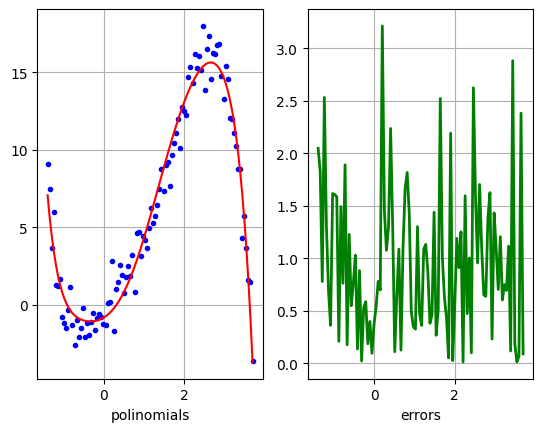

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def noisy_signal(signal):
    return np.random.normal(0, 1, n) + signal

n = 100
x = np.linspace(-1.4, 3.7, n)
A = np.vstack([np.power(x, 7), np.power(x, 6), np.power(x, 5), np.power(x, 3), np.square(x), x, np.ones(len(x)),]).T

f = 3*x-0.12*pow(x, 2)+2*pow(x, 4)-pow(x, 5)+0.12*pow(x, 6)

np.random.seed(2)
function = noisy_signal(f)
B = function[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), B)

fit_polinomial = alpha[0]*pow(x, 7) + alpha[1]*pow(x, 6) + alpha[2]*pow(x, 5) \
             + alpha[3]*pow(x, 3) + alpha[4]*x**2+alpha[5]*x + alpha[6] # 7-th order polynomial

err = np.abs(np.subtract(fit_polinomial, function))
fig, axis = plt.subplots(1, 2)
axis[0].plot(x, function, 'b.', linewidth=2.0,)
axis[0].plot(x, fit_polinomial, 'r')
axis[0].set_xlabel('polinomials')
axis[0].grid(True)
axis[1].plot(x, err, 'g', linewidth=2.0, )
axis[1].set_xlabel('errors')
axis[1].grid(True)
plt.show()

plt.show()